# Animal Crossing Character Popularity #


## Background ##

At the beginning of 2020, specifically March of 2020, the popular gaming franchise _Nintendo_ released it's newest game, _Animal Crossing: New Horizons,_ a new version of previous Animal Crossing games that came from the years prior. Animal Crossing is a role-playing game, where you are a character that lives in a town, or on an island, that is inhabited by other villagers, that happen to be different animals. There, you can interact with these characters, craft materials, and create the space that you would want to live in. Because of the lockdown caused by COVID-19 being around the same time of the release of New Horizons, this game was more popular than Nintendo thought it would be.

That being said, there were a lot of people who began to create popularity rankings and wish-lists for specific characters that people wanted on their islands. For example, I remember everyone wanting sherb on their island, who is a cute little blue sheep, pictured below.

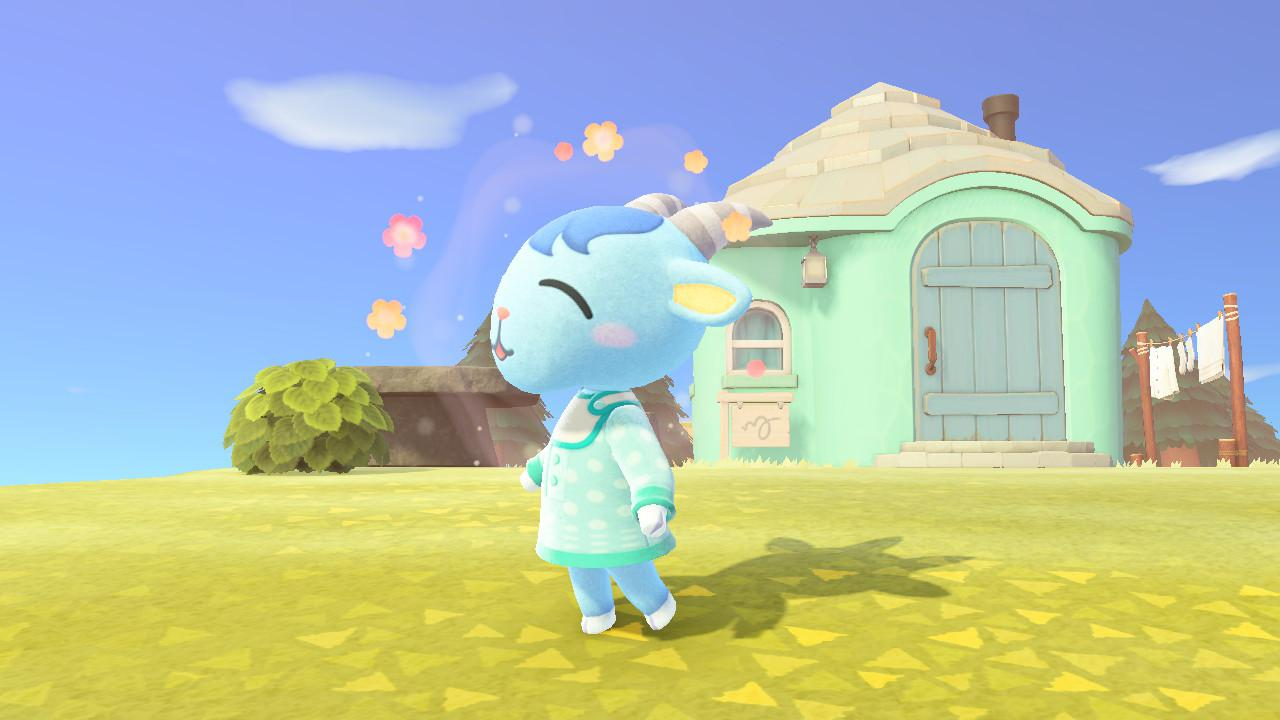

But, I have always wondered if there was a reason behind everyone wanting these specific villagers; was it because there was a general concensus that everyone had them therefore they were popular? Was because of their personality? Was it because of how (subjectively) pretty they looked? Well, for this analysis, I chose to see if the villagers species had anything to do with the popularity of said villager. I am curious to see how the Animal Crossing community comes up with these conclusions, and I want to see if there are any extra factors that may lead to this.

## Data Gathering and Sorting ##

First off, I needed to find the correct data to use. I needed to find a full list of all of the characters, which I was able to find from the Animal Crossing Wiki website. It had everything you needed to know about this character; personality, species, hobby, birthday, the furniture it could have in their house, everything. So, from that data frame, I exported it as a csv file to import into here.

In [174]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [175]:
vil_all = pd.read_csv('ACNH_Villager_List.csv')
vil_all.head()

,Name,Icon Image,Photo Image,House Image,Species,Gender,Personality,Subtype,Hobby,Birthday,...,Flooring,Furniture List,Furniture Name List,DIY Workbench,Kitchen Equipment,Version Added,Name Color,Bubble Color,Filename,Unique Entry ID
0,Ace,NaN,NaN,NaN,Bird,Male,Jock,A,Nature,8/11,...,green-paint flooring,1051;2554;2606;3122;4338;12309;12780;13114;131...,water bird;double sofa;ranch bed;mini DIY work...,"3122,3_0","14054,5_0",2.0.0,#fffce9,#0961f6,brd09,cBJxF2eoM4Cymei82
1,Admiral,NaN,NaN,NaN,Bird,Male,Cranky,A,Nature,1/27,...,tatami,717;787;1849;2736;3438;3449;3622;3802;4029;410...,clay furnace;tape deck;kotatsu;retro fan;woode...,"3122,2_0",717,1.0.0,#fffce9,#0ca54a,brd06,B3RyfNEqwGmcccRC3
2,Agent S,NaN,NaN,NaN,Squirrel,Female,Peppy,B,Fitness,7/2,...,colorful tile flooring,290;1708;2560;3449;3468;3971;4080;4753;4756;71...,treadmill;cassette player;wooden chest;wooden ...,"3995,4_0","3616,2_0",1.0.0,#fffce9,#0961f6,squ05,SGMdki6dzpDZyXAw5
3,Agnes,NaN,NaN,NaN,Pig,Female,Big Sister,A,Play,4/21,...,arabesque flooring,896;3428;3773;3951;3958;4027;4129;7136;7235;72...,cat tower;wall-mounted TV (50 in.);terrarium;a...,"3943,2_0","3616,5_0",1.0.0,#fffce9,#515151,pig17,jzWCiDPm9MqtCfecP
4,Al,NaN,NaN,NaN,Gorilla,Male,Lazy,B,Fitness,10/18,...,green rubber flooring,833;1452;3307;3697;3946;3960;4013;4078;4116;78...,upright locker;weight bench;digital scale;port...,"3943,3_0","3251,4_0",1.0.0,#fffad4,#798040,gor08,LBifxETQJGEaLhBjC


On a separate notebook, I found a website where you can vote every month on your favorite 5 villagers, and in combination of everyone else who is doing the same thing, we now have a viable list to work from. I broke down the code from this site, sorting it and only grabbing the essential parts; the name, and the number ranking.

In [176]:
vil_rank = pd.read_csv('20231128ACNH_Rankings.csv')
vil_rank.head()

,Unnamed: 0,Name,Rank
0,0,Wade,1
1,1,Shino,2
2,2,Bob,3
3,3,Maple,4
4,4,Raymond,5


With that, I was able to merge the dataframes to share the common attribute, which was the villager names.

In [177]:
merged_df = pd.merge(vil_all, vil_rank, on='Name', how='inner')

In [178]:
merged_df.head()

,Name,Icon Image,Photo Image,House Image,Species,Gender,Personality,Subtype,Hobby,Birthday,...,Furniture Name List,DIY Workbench,Kitchen Equipment,Version Added,Name Color,Bubble Color,Filename,Unique Entry ID,Unnamed: 0,Rank
0,Ace,NaN,NaN,NaN,Bird,Male,Jock,A,Nature,8/11,...,water bird;double sofa;ranch bed;mini DIY work...,"3122,3_0","14054,5_0",2.0.0,#fffce9,#0961f6,brd09,cBJxF2eoM4Cymei82,369,370
1,Admiral,NaN,NaN,NaN,Bird,Male,Cranky,A,Nature,1/27,...,clay furnace;tape deck;kotatsu;retro fan;woode...,"3122,2_0",717,1.0.0,#fffce9,#0ca54a,brd06,B3RyfNEqwGmcccRC3,327,328
2,Agent S,NaN,NaN,NaN,Squirrel,Female,Peppy,B,Fitness,7/2,...,treadmill;cassette player;wooden chest;wooden ...,"3995,4_0","3616,2_0",1.0.0,#fffce9,#0961f6,squ05,SGMdki6dzpDZyXAw5,317,318
3,Agnes,NaN,NaN,NaN,Pig,Female,Big Sister,A,Play,4/21,...,cat tower;wall-mounted TV (50 in.);terrarium;a...,"3943,2_0","3616,5_0",1.0.0,#fffce9,#515151,pig17,jzWCiDPm9MqtCfecP,77,78
4,Al,NaN,NaN,NaN,Gorilla,Male,Lazy,B,Fitness,10/18,...,upright locker;weight bench;digital scale;port...,"3943,3_0","3251,4_0",1.0.0,#fffad4,#798040,gor08,LBifxETQJGEaLhBjC,378,379


Now, I don't need every single row of information about this character, so I kept the information that I would absolutely need, and some other information that could be used in the future, if I ever want to investigate villager popularity in the future (ex: their personality type or their birthday). And, once it is cleaned up, I want it to be in numerical order of rank number to more easily look at the rankings.

In [179]:
columns_keep = ['Name', 'Rank', 'Personality', 'Species', 'Birthday']

In [180]:
merged_df_clean = merged_df[columns_keep]
merged_df_clean.head()

,Name,Rank,Personality,Species,Birthday
0,Ace,370,Jock,Bird,8/11
1,Admiral,328,Cranky,Bird,1/27
2,Agent S,318,Peppy,Squirrel,7/2
3,Agnes,78,Big Sister,Pig,4/21
4,Al,379,Lazy,Gorilla,10/18


In [181]:
vil = merged_df_clean.sort_values(by='Rank', ascending=True)
vil.head()

,Name,Rank,Personality,Species,Birthday
396,Wade,1,Lazy,Penguin,10/30
346,Shino,2,Peppy,Deer,10/31
49,Bob,3,Lazy,Cat,1/1
232,Maple,4,Normal,Bear cub,6/15
310,Raymond,5,Smug,Cat,10/1


## Data Analysis and Graphing ##
Let's look at how many we have of each species. As you can see, we have the most in cats, and the least amount in octopi. Because we don't have the same amount in all categories of species, we will have to be careful when looking at the future graphs, to look at the average of species and not the amount as a whole.

In this instance, I used a bar plot, and specifically called out the amount of villagers there are for each species.

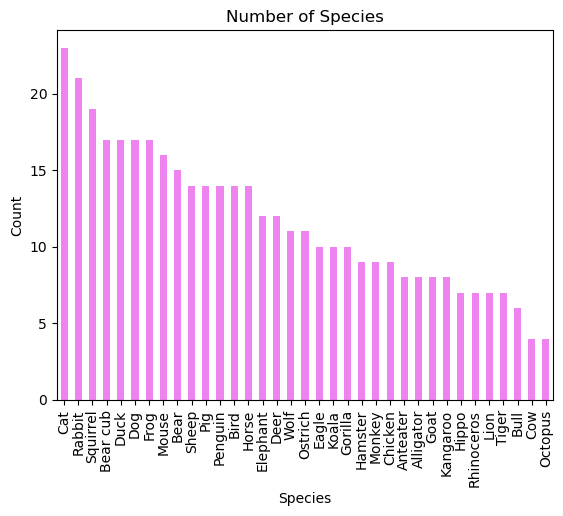

In [182]:
vil['Species'].value_counts().plot(kind='bar', color='violet')

plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Number of Species')

plt.xticks(rotation=90)
plt.show()

In [183]:
vil_sort = vil[['Species', 'Rank']].groupby('Species').min().sort_values('Rank')

With the above code, we will also be able to look at the first time on of the species appears on the tier list. That way, we can see which species is most popular, and which one is least popular. We will not be able to see clearly if there is a correlation between the species and the tier ranking, but it can give us an idea of what we'll see.

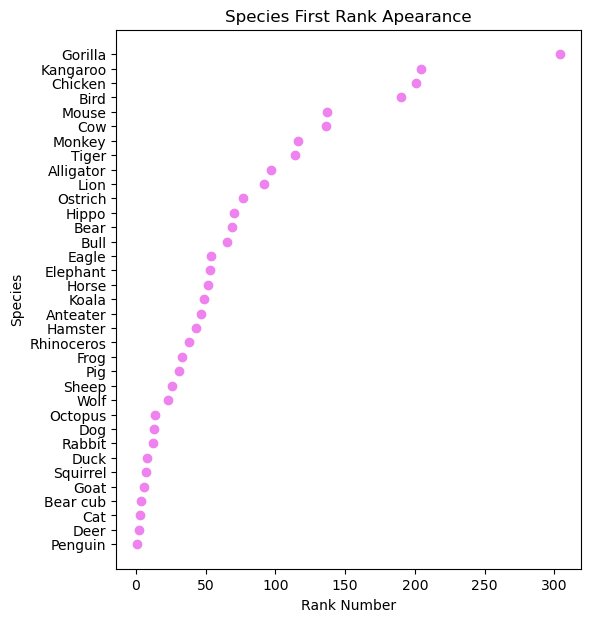

In [184]:
plt.figure(figsize=(6,7))

plt.scatter(vil_sort['Rank'], vil_sort.index, color='violet')

plt.xlabel('Rank Number')
plt.ylabel('Species')
plt.title('Species First Rank Apearance')

plt.show()

We can see, overall, the penguin species may be a popular one, as it is number one on the list, and Gorilla will be lower, as the first time it shows up is in the 250-300 ranking spot.

## Graphing in Tiers ##
To get the best idea of how the species of characters ranks on a popularity list, I divided the rankings into 6 tiers, like a typical tier chart you would find online. With this, I evenly divided all 409 ranked characters into each section. This way, we can see how many species are in each ranking, instead of the first species appearance as a whole.

First, I needed to make a condition of only selecting the characters that were 1-69, as the first "s tier," and give it it's own dataframe. I did that 5 more times after.

In [185]:
s_tier = (vil['Rank'] >= 1) & (vil['Rank'] <= 69)
a_tier = (vil['Rank'] >= 70) & (vil['Rank'] <= 138)
b_tier = (vil['Rank'] >= 139) & (vil['Rank'] <= 207)
c_tier = (vil['Rank'] >= 208) & (vil['Rank'] <= 276)
d_tier = (vil['Rank'] >= 277) & (vil['Rank'] <= 345)
f_tier = (vil['Rank'] >= 346) & (vil['Rank'] <= 409)

df_s = vil[s_tier]
df_a = vil[a_tier]
df_b = vil[b_tier]
df_c = vil[c_tier]
df_d = vil[d_tier]
df_f = vil[f_tier]

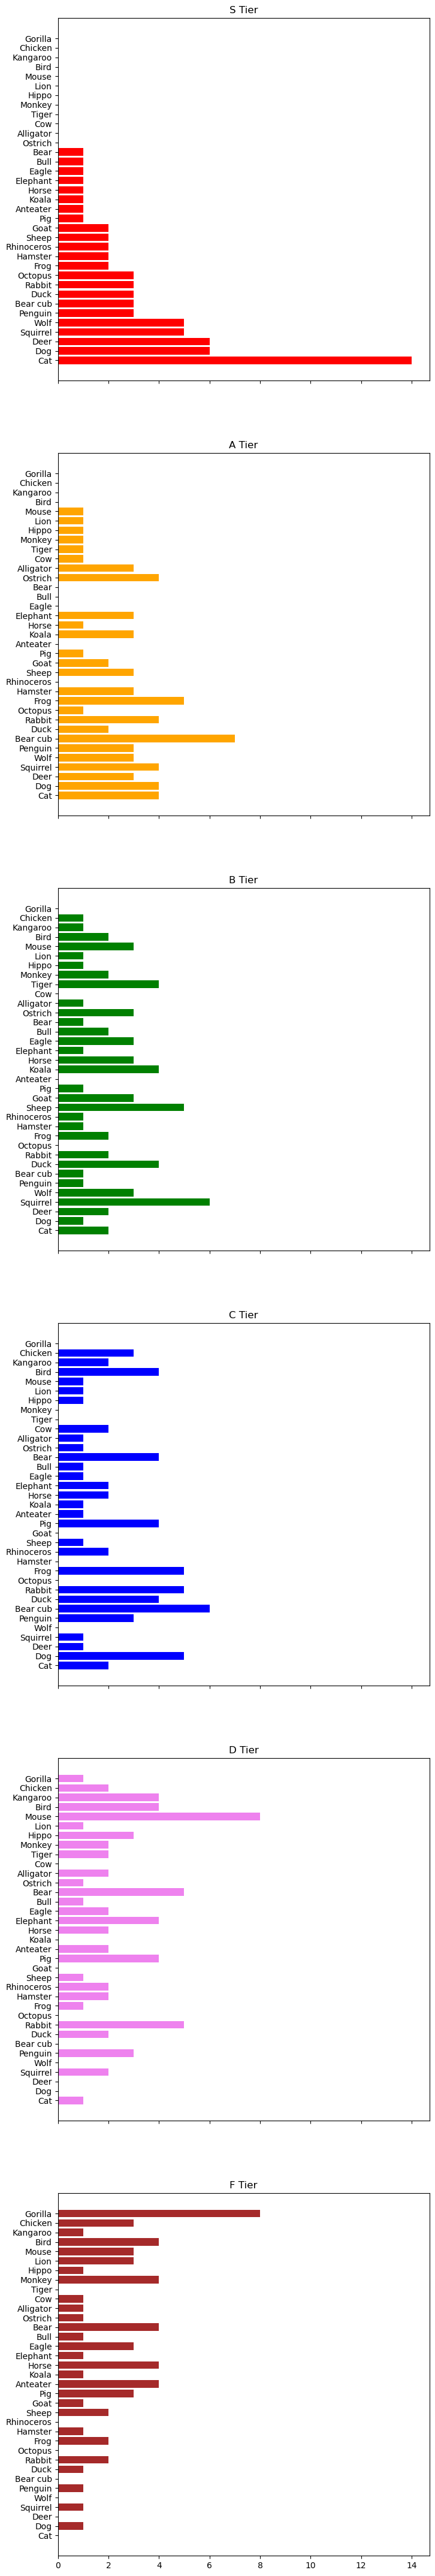

In [186]:
figl, ax1 = plt.subplots(6, 1, sharex=True, sharey=True, figsize=(8,55))

ax1[0].barh(df_s['Species'].value_counts().index, df_s['Species'].value_counts(), color='red')
ax1[0].set_title('S Tier')
ax1[1].barh(df_a['Species'].value_counts().index, df_a['Species'].value_counts(), color='orange')
ax1[1].set_title('A Tier')
ax1[2].barh(df_b['Species'].value_counts().index, df_b['Species'].value_counts(), color='green')
ax1[2].set_title('B Tier')
ax1[3].barh(df_c['Species'].value_counts().index, df_c['Species'].value_counts(), color='blue')
ax1[3].set_title('C Tier')
ax1[4].barh(df_d['Species'].value_counts().index, df_d['Species'].value_counts(), color='violet')
ax1[4].set_title('D Tier')
ax1[5].barh(df_f['Species'].value_counts().index, df_f['Species'].value_counts(), color='brown')
ax1[5].set_title('F Tier')

plt.show()

From the bar charts above, we can see the total amount of species in each tier. With this, we can see that there is a pattern with how many characters are in each tier, and what ranking they are. If it were evenly spaced, there would be at least one species in each category, for the ones that have more than 6 characters in their species. But, for the cats, about half of the cat charaters are in S tier, and the majority of gorillas are in F tier, with the remaining being in the tier above (still bad). Unfortunately, because of the way that the data is organized, I was unable to find a way to stack all the bars onto one another to see the data in a more compact place. But, I put it all into a scatter plot, with some jitter to see overlapping dots. So basically, the scatter plot is plotting where how many characters are in each species, with the different colored dots representing the different tiers (colored similarly to the bar chats above.)

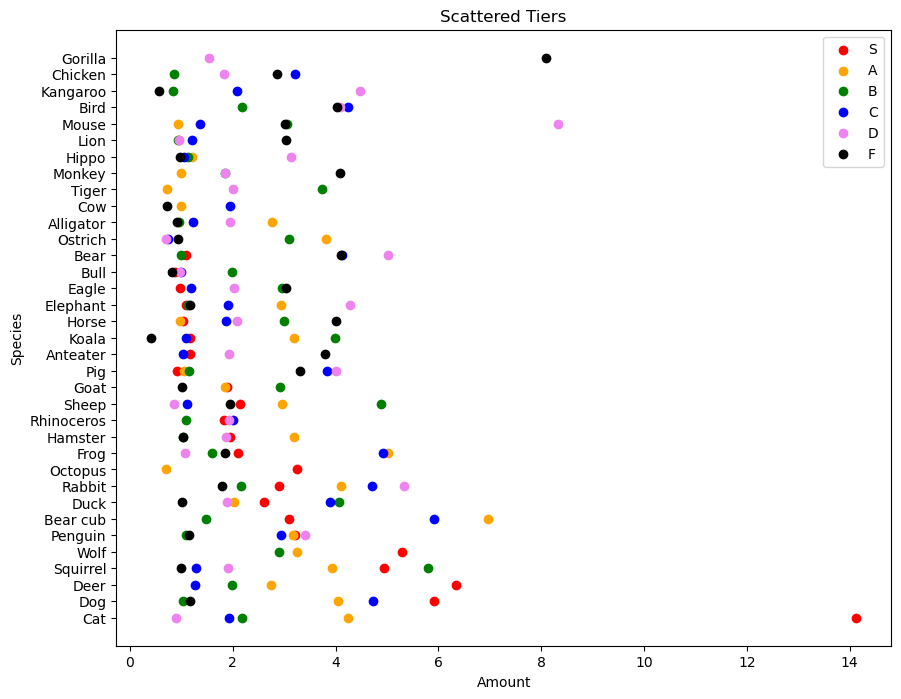

In [195]:
fig4, ax4 = plt.subplots(figsize=(10, 8))

def add_jitter(data, jitter_factor=0.2):
    return data + np.random.normal(0, jitter_factor, size=len(data))

ax4.scatter(add_jitter(df_s['Species'].value_counts()), df_s['Species'].value_counts().index, color='red', label='S')
ax4.scatter(add_jitter(df_a['Species'].value_counts()), df_a['Species'].value_counts().index, color='orange', label='A')
ax4.scatter(add_jitter(df_b['Species'].value_counts()), df_b['Species'].value_counts().index, color='green', label='B')
ax4.scatter(add_jitter(df_c['Species'].value_counts()), df_c['Species'].value_counts().index, color='blue', label='C')
ax4.scatter(add_jitter(df_d['Species'].value_counts()), df_d['Species'].value_counts().index, color='violet', label='D')
ax4.scatter(add_jitter(df_f['Species'].value_counts()), df_f['Species'].value_counts().index, color='black', label='F')

ax4.set_title('Scattered Tiers')
plt.xlabel('Amount')
plt.ylabel('Species')

ax4.legend()

plt.show()

With this scatter plot, we can see a general clump of dots in the 0-2 portion, which proves a minor amount of non-bias, but the outliers and scatterings of the high values shows a bit of bias toward specific animals, like cats and deer.

## Conclusion ##
Overall, I believe that there is a sway in popularity when it comes to the species of the Animal Crossing Villagers. It seems like the cuter, smaller, and overall nicer animals are the top pick for most people. Whereas the more-hostile and larger animals, like the gorillas, eagles, and kangaroos, are less popular. If I were to change something I did, I would figure out if I could've organized my data in a better way, to be able to stack the bar charts on top of eachother. I would also like to see how the birthdays or personality types would do under the same analysis, but that is for another time. But, for now, you can use this data to decide what species you do or do not want on your island, based on other people's opinions.

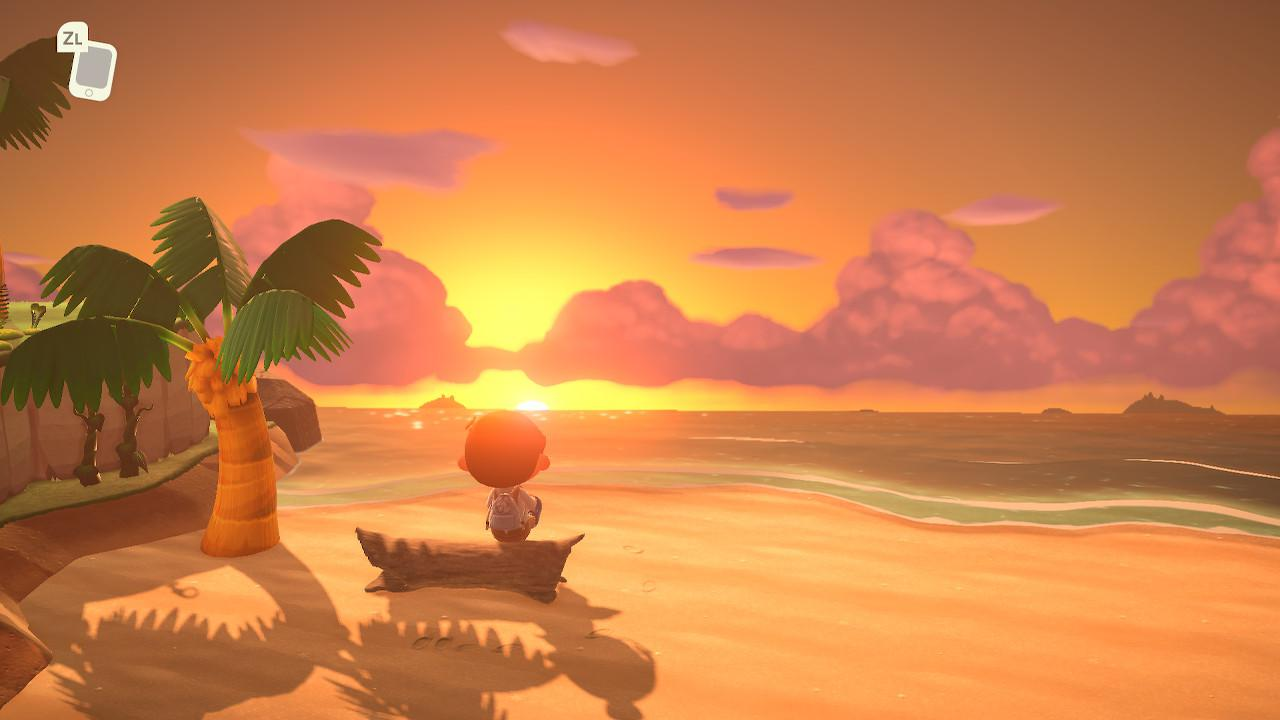